# Regula de învăţare a perceptronului

[ 0.56080071 -0.22846107  0.92843634]
(200, 3)


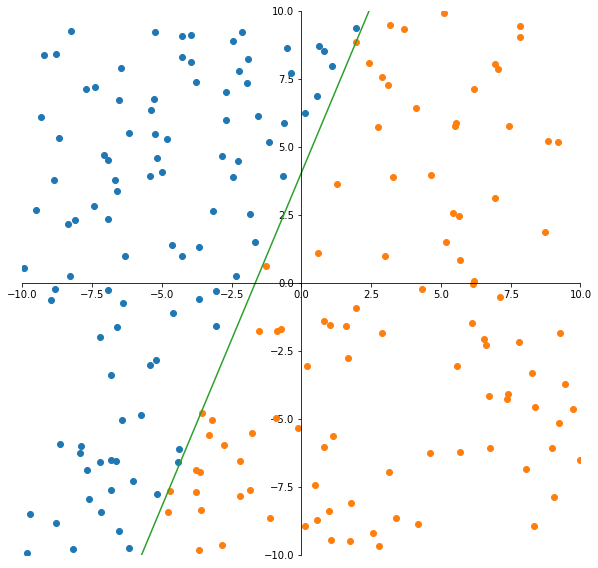

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# pentru reprezentarea am considerat forma ecuatiei ax + by + 1 = 0
# deci y = (-1 - ax) / b
# x = (-c - by) / a
# dar voi puteti folosi orice forma, inclusiv ax + by + c = 0

# alegem un exemplu de hiperplan 2D (dreaptă)
# a, b, c = (-1.0 / 3), (-1.0 / 2), 1
a = np.random.rand() * 2 - 1
b = np.random.rand() * 2 - 1
c = np.random.rand() * 4 - 2
line = np.array([a, b, c])
print(line)

# porţiunea de plan pe care o reprezentăm este de x aparţine lui [-lim, lim]
lim = 10

# numărul de puncte de fiecare fel
n = 100

class1 = np.array([[1, 1, 1]])
class2 = np.array([[1, 1, 1]])

while class1.shape[0] < n+1 or class2.shape[0] < n+1:
    punct = np.random.rand(3) * 2 * lim - lim
    punct[2] = 1
    if punct @ line < 0:
        if class1.shape[0] < n + 1:
            class1 = np.append(class1, punct[np.newaxis, :], axis=0)
    elif punct @ line > 0:
        if class2.shape[0] < n + 1:
            class2 = np.append(class2, punct[np.newaxis, :], axis=0)

class1 = np.delete(class1, 0, axis=0)
class2 = np.delete(class2, 0, axis=0)

y = np.append(class1, class2, axis=0)
print(y.shape)
d = np.concatenate((np.repeat(-1, n), np.repeat(1, n)))

# plt.figure(figsize=(10, 10))
# plt.plot(class1[:, 0], class1[:, 1], 'o', color='tab:blue')
# plt.plot(class2[:, 0], class2[:, 1], 'o', color='tab:orange')

# # correct line
# start_y, stop_y = (-c + a*lim) / b, (-c - a*lim) / b
# if start_y <= lim:
#     plt.plot([-lim, lim], [start_y, stop_y], color='tab:green')
# else:
#     plt.plot([-lim, lim], [(-c + a*lim) / b, (-c - a*lim) / b], color='tab:green')
    
# plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlim(xmin=-lim, xmax=lim)
plt.ylim(ymin=-lim, ymax=lim)
plt.plot(class1[:, 0], class1[:, 1], 'o', color='tab:blue')
plt.plot(class2[:, 0], class2[:, 1], 'o', color='tab:orange')
plt.plot([-lim, lim], [(-c + a*lim) / b, (-c - a*lim) / b], color='tab:green')
plt.show()

In [13]:
# coeficienţii hiperplanului căutat sunt iniţializaţi aleator
w = np.random.rand(3)

# păstrăm o copie ca să reprezentăm dreapta iniţială
w_init = w.copy()

error = True

while (error):
    error = False
    for i in range(2 * n):
        if np.sign(y[i] @ w) != d[i]:
            error = True
            w += d[i] * y[i]

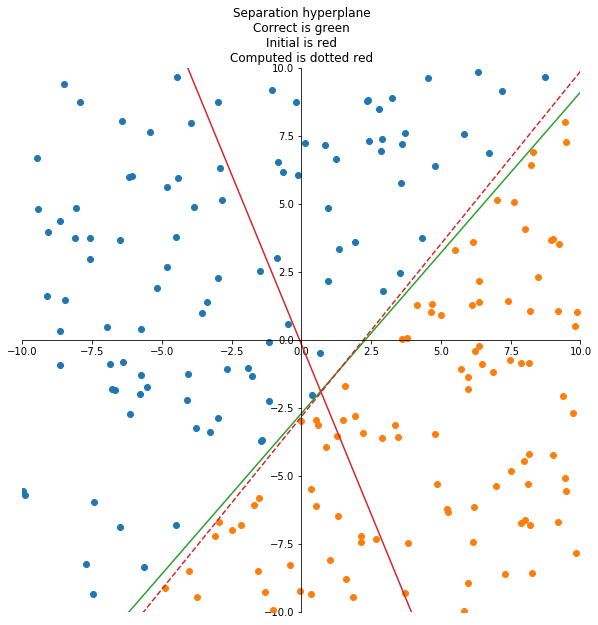

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlim(xmin=-lim, xmax=lim)
plt.ylim(ymin=-lim, ymax=lim)
plt.title('Separation hyperplane\nCorrect is green\nInitial is red\nComputed is dotted red')
plt.plot(class1[:, 0], class1[:, 1], 'o', color='tab:blue')
plt.plot(class2[:, 0], class2[:, 1], 'o', color='tab:orange')

# correct line
start_y, stop_y = (-c + a*lim) / b, (-c - a*lim) / b
plt.plot([-lim, lim], [start_y, stop_y], color='tab:green')

# initial line
start_y, stop_y = (-w_init[2] + w_init[0]*lim) / w_init[1], (-w_init[2] - w_init[0]*lim) / w_init[1]
plt.plot([-lim, lim], [start_y, stop_y], color='tab:red')

# computed line
start_y, stop_y = (-w[2] + w[0]*lim) / w[1], (-w[2] - w[0]*lim) / w[1]
plt.plot([-lim, lim], [start_y, stop_y], color='tab:red', linestyle='dashed')
    
plt.show()
# dreapta de separaţie este foarte aproape (uneori coincide) cu cea teoretică

# Perceptron pentru caracterele "0" şi "1" reprezentate ca rastru de pixeli

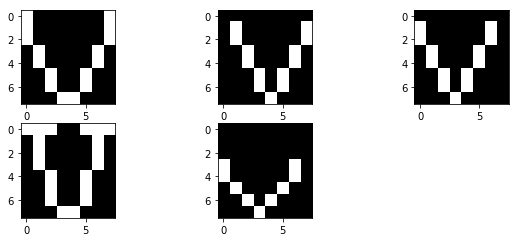

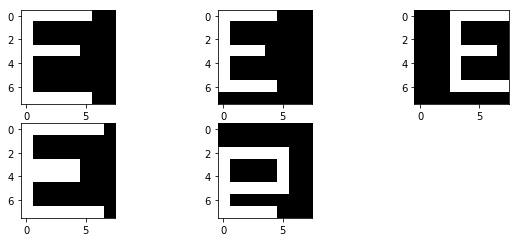

In [5]:
# pentru că mi-a fost lene, am luat dimensiunea rastrului de 7 x 5 şi nu 8 x 8
# de asemenea am doar 5 caractere de train din fiecare clasă,
# respectiv 3 caractere de test din fiecare fel
# voi faceti cum se cere!

import numpy as np
import matplotlib.pyplot as plt



train_set_x = np.array([
    [1, 0, 0, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 0, 0, 1,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 0, 1, 0, 0, 1, 0, 0,
     0, 0, 1, 0, 0, 1, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0, 0, 1,
     0, 1, 0, 0, 0, 0, 0, 1,
     0, 0, 1, 0, 0, 0, 1, 0,
     0, 0, 1, 0, 0, 0, 1, 0,
     0, 0, 0, 1, 0, 1, 0, 0,
     0, 0, 0, 1, 0, 1, 0, 0,
     0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 1, 0, 0,
     0, 1, 0, 0, 0, 1, 0, 0,
     0, 0, 1, 0, 1, 0, 0, 0,
     0, 0, 1, 0, 1, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 1, 1, 1,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 0, 1, 0, 0, 1, 0, 0,
     0, 0, 1, 0, 0, 1, 0, 0,
     0, 0, 1, 0, 0, 1, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 1, 0, 0,
     0, 0, 1, 0, 1, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0, 0],
    
    [1, 1, 1, 1, 1, 1, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 1, 1, 1, 0,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 1, 1, 1, 1,
     0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 0, 0, 0,
     1, 1, 1, 1, 1, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 0, 0,
     1, 0, 0, 0, 0, 1, 0, 0,
     1, 0, 0, 0, 0, 1, 0, 0,
     1, 1, 1, 1, 1, 1, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 0, 0, 0]
])
train_set_y = [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]

#print(train_set_x)

fig = plt.figure(num=1, figsize=(10, 8)) 
for i in range(0, 5):
    ax = fig.add_subplot(430 + i + 1)
    ax.imshow(255 * train_set_x[i].reshape(8, 8), cmap='gray')
    
fig = plt.figure(num=2, figsize=(10, 8)) 
for i in range(5, 10):
    ax = fig.add_subplot(430 + i - 4)
    ax.imshow(255 * train_set_x[i].reshape(8, 8), cmap='gray')

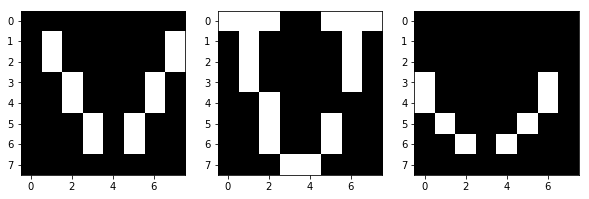

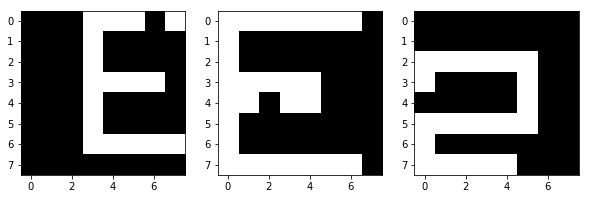

In [6]:
# setul de test are câte un pixel lipsă
test_set_x = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0, 0, 1,
     0, 1, 0, 0, 0, 0, 0, 1,
     0, 0, 1, 0, 0, 0, 1, 0,
     0, 0, 1, 0, 0, 0, 1, 0,
     0, 0, 0, 1, 0, 1, 0, 0,
     0, 0, 0, 1, 0, 1, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 1, 1, 1,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 0, 1, 0,
     0, 0, 1, 0, 0, 0, 0, 0,
     0, 0, 1, 0, 0, 1, 0, 0,
     0, 0, 1, 0, 0, 1, 0, 0,
     0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 1, 0,
     1, 0, 0, 0, 0, 0, 1, 0,
     0, 1, 0, 0, 0, 1, 0, 0,
     0, 0, 1, 0, 1, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0],
    
    [0, 0, 0, 1, 1, 1, 0, 1,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 1, 1, 1, 0,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 0, 0, 0, 0,
     0, 0, 0, 1, 1, 1, 1, 1,
     0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 0, 0, 0,
     1, 1, 0, 1, 1, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 0, 0,
     1, 0, 0, 0, 0, 1, 0, 0,
     0, 0, 0, 0, 0, 1, 0, 0,
     1, 1, 1, 1, 1, 1, 0, 0,
     1, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 0, 0, 0]
])
test_set_y = [-1, -1, -1, 1, 1, 1]

fig = plt.figure(num=3, figsize=(10, 8)) 
for i in range(0, 3):
    ax = fig.add_subplot(130 + i + 1)
    ax.imshow(255 * test_set_x[i].reshape(8, 8), cmap='gray')
    
fig = plt.figure(num=4, figsize=(10, 8)) 
for i in range(3, 6):
    ax = fig.add_subplot(130 + i - 2)
    ax.imshow(255 * test_set_x[i].reshape(8, 8), cmap='gray')

In [11]:
# funcţia de activare este o simplă treaptă [-1, 1] în jurul lui 0
h = np.vectorize(lambda net: 1 if net >= 0 else -1)


w = np.random.rand(65)

n = 10

train_set = np.append(train_set_x, np.repeat(1, n)[:, np.newaxis], axis=1)

test_set = np.append(test_set_x, np.repeat(1, 6)[:, np.newaxis], axis=1)

error = True
iteratii = 0

while (error):
    iteratii += 1
    error = False
    for i in range(n):
        if np.sign(train_set[i] @ w) != train_set_y[i]:
            error = True
            w += train_set_y[i] * train_set[i]
            
print(iteratii)

# tipărim numărul de clasificări greşite pentru setul de instruire
print("train: ", h(np.dot(train_set, w[:, np.newaxis])).flatten(), " vs. ", train_set_y, " diffs: ", sum(h(np.dot(train_set, w[:, np.newaxis])).flatten() - train_set_y) / 2)

# tipărim numărul de clasificări greşite şi pentru setul de test
print("test: ", h(np.dot(test_set, w[:, np.newaxis])).flatten(), " vs. ", test_set_y, " diffs: ", sum(h(np.dot(test_set, w[:, np.newaxis])).flatten() - test_set_y) / 2)

# foarte rar apare o diferenţă

3
train:  [-1 -1 -1 -1 -1  1  1  1  1  1]  vs.  [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]  diffs:  0.0
test:  [-1 -1 -1  1  1  1]  vs.  [-1, -1, -1, 1, 1, 1]  diffs:  0.0
